In [5]:
!pip install opencv-python

In [6]:
!wget https://images.pexels.com/photos/860562/pexels-photo-860562.jpeg

--2019-03-23 19:17:27--  https://images.pexels.com/photos/860562/pexels-photo-860562.jpeg
Resolving images.pexels.com (images.pexels.com)... 104.17.209.102, 104.17.208.102, 2606:4700::6811:d166, ...
Connecting to images.pexels.com (images.pexels.com)|104.17.209.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 787839 (769K) [image/jpeg]
Saving to: ‘pexels-photo-860562.jpeg’

pexels-photo-860562 100%[===================>] 769.37K  --.-KB/s    in 0.05s   

2019-03-23 19:17:27 (14.3 MB/s) - ‘pexels-photo-860562.jpeg’ saved [787839/787839]



In [0]:
import cv2
import numpy as np
import PIL
from IPython.display import display

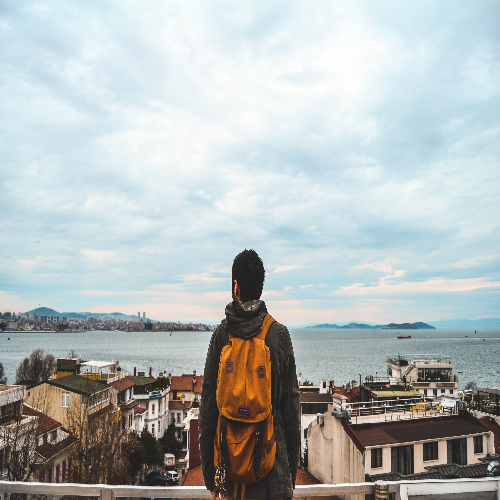

In [75]:
#Resmi okuyalım
imge = cv2.imread("pexels-photo-860562.jpeg")

#Rengi BGR'den RGB'ye çevirelim
imge = cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)

#Resmin boyutlarını normalize edelim
imge = cv2.resize(imge, (500, 500))

#Bastıralım
display(PIL.Image.fromarray(imge))

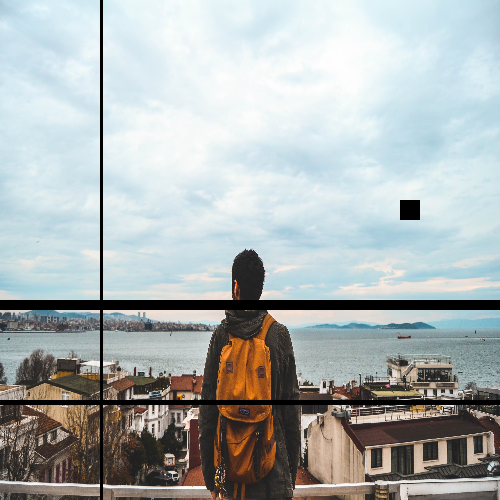

In [80]:
#Maskeyi oluşturalım, rastgele çizgiler ve bir kare çizip resmi bozalım
imge = imge.astype("uint8")
maske = np.ones((500, 500,3), dtype=imge.dtype)
maske[300:310,:,:] = 0
maske[400:405,:,:] = 0
maske[200:220,400:420,:] = 0
maske[:,100:103,:] = 0

#Bunu bitwise and gibi düşünebilirsiniz
imge = np.multiply(imge, maske)

# Bastıralım
display(PIL.Image.fromarray(imge))


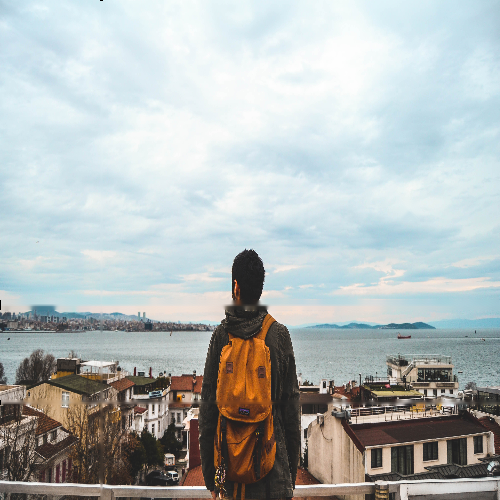

In [81]:
#inpainting fonksiyonu bizim oluşturduğumuz maskenin tam tersini istiyor, o yüzden 1'den çıkarıyoruz bütün maskeyi
maske = 1-maske[:,:,0]

#CV'nin inpainting fonksiyonu
imge = cv2.inpaint(imge,maske,3,cv2.INPAINT_TELEA)

# Bastıralım
display(PIL.Image.fromarray(imge))